In [1]:
import cv2
import json
from matplotlib import pyplot as plt
from os import walk
import xml.etree.ElementTree as ET

In [39]:
path = 'tags/'
pathi = 'images/'
folder = 'RED/'

In [29]:
## Read json and show images
f = ['Timov_RED.json']
# for (dirpath, dirnames, filenames) in walk(path):
#     f.extend(filenames)
#     break
    
# for name in f:
#     with open(path+'Timov_RED.json', 'r') as file:
#         jsn = json.load(file)

#     for t in jsn:
#         print(pathi + folder + t['image'])
        
#         image = cv2.imread(pathi + folder + t['image'])
#         plt.imshow(image)
#         plt.show()

In [40]:
## Transform to Pascal VOC
# fs = []
# for (dirpath, dirnames, filenames) in walk(path):
#     fs.extend(filenames)
#     break
f = ['Timov_RED.json']

for name in f:
    with open(path+name, 'r') as file:
        jsn = json.load(file)

    for t in jsn:
        print(t['image'])
        image = cv2.imread(pathi + folder + t['image'])

        xml_name = "tags/{}{}.xml".format(folder, t['image'].split('.')[0])
        f = open(xml_name, "w")
        f.write("")
        f.close()

        f = open(xml_name, "a")
        f.write("<annotation>\n")
        f.write("	<folder>{}</folder>\n".format(folder.replace('/', '')))
        f.write("	<filename>{}</filename>\n".format(t['image']))
        f.write("	<path>/{}{}{}</path>\n".format(pathi, folder, t['image']))
        f.write("	<source>\n")
        f.write("		<database>Unknown</database>\n")
        f.write("	</source>\n")
        f.write("	<size>\n")
        f.write("		<width>{}</width>\n".format(image.shape[1]))
        f.write("		<height>{}</height>\n".format(image.shape[0]))
        f.write("		<depth>{}</depth>\n".format(image.shape[2]))
        f.write("	</size>\n")
        f.write	("	<segmented>0</segmented>\n")
        
        for tag in t['tags']:
            x_min = int(tag['pos']['x'])
            y_min = int(tag['pos']['y'])
            x_max = x_min + int(tag['pos']['w'])
            y_max = y_min + int(tag['pos']['h'])
            
            f.write("	<object>\n")
            f.write("		<name>{}</name>\n".format(tag['name']))
            f.write("		<pose>Unspecified</pose>\n")
            f.write("		<truncated>0</truncated>\n")
            f.write("		<difficult>0</difficult>\n")
            f.write("		<bndbox>\n")
            f.write("			<xmin>{}</xmin>\n".format(x_min))
            f.write("			<ymin>{}</ymin>\n".format(y_min))
            f.write("			<xmax>{}</xmax>\n".format(x_max))
            f.write("			<ymax>{}</ymax>\n".format(y_max))
            f.write("		</bndbox>\n")
            f.write("	</object>\n")
        f.write("</annotation>\n")
        f.close()
        print('DONE')
#         f = open(xml_name, "r")
#         print(f.read())
#         f.close()

frame300.jpg
DONE
frame301.jpg
DONE
frame302.jpg
DONE
frame303.jpg
DONE
frame304.jpg
DONE
frame305.jpg
DONE


21


TypeError: Image data cannot be converted to float

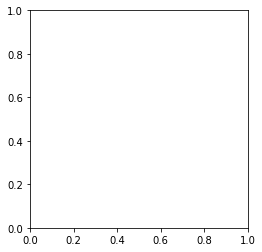

In [42]:
from xml.dom import minidom

mydoc = minidom.parse('tags/PL/frame37.xml')
objects = mydoc.getElementsByTagName('object')

image = cv2.imread(pathi + folder + mydoc.getElementsByTagName('filename')[0].firstChild.data)
count = 0
for obj in objects:
    xmin = obj.getElementsByTagName('xmin')[0].firstChild.data
    xmax = obj.getElementsByTagName('xmax')[0].firstChild.data
    ymin = obj.getElementsByTagName('ymin')[0].firstChild.data
    ymax = obj.getElementsByTagName('ymax')[0].firstChild.data
    
    count = count + 1
    
#     image = cv2.rectangle(image, (xmin, ymin), )
    image = cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 1) 

print(count)
plt.imshow(image)
plt.show()
